In [17]:
import pandas as pd
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
from tqdm import tqdm

init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
chem_similarity_df = pd.read_csv('./data/chem_similarity_tr.csv')

In [3]:
chem_similarity_df

,chem1,chem2,equal
0,CC1=CN([C@H]2C[C@H](O[N+](=O)[O-])[C@@H](CO)O2...,NC1=NC(=O)N(C=C1)[C@H]2C[C@H](O[N+](=O)[O-])[C...,1
1,NC1=NC(=O)N(C=C1)[C@H]2C[C@H](O[N+](=O)[O-])[C...,CC1=CN([C@H]2C[C@H](O[N+](=O)[O-])[C@@H](CO)O2...,1
2,COc1ccccc1\C=C/C(=O)OC[C@@H]2CCCN3CCCC[C@H]23,CC1CC2C(C)C(=O)N3C(CC(C)C3c4ccccc4)C(C)C(=O)N2...,1
3,COC(=O)C1CC23C(N(C)c4ccc(OC)cc24)C(=C(N=C3N1C(...,O=C(OCc1ccccc1)c2ccccc2,1
4,CC(C)OC(=O)C(O)(c1ccc(Cl)cc1)c2ccc(Cl)cc2,CN1CCCCC1C(=O)N2CCC(CC2)Oc3cccc(CN4CCN(CC4)c5c...,1
...,...,...,...
199975,C[C@H](C\C=C\C(=O)C)[C@H]1CC[C@@]2(C)[C@@H]3CC...,COc1ccc(cc1)C2CC2CSC3=NC(=C(C)C(=O)N3)C(C)c4c(...,0
199976,[Na+].COc1ccc(cc1O)c2c3c4cc(OC)c(OS(=O)(=O)[O-...,OC[C@@H]1CC[C@@H](O1)N2C=CC(=O)NC2=O,0
199977,OC1[C@H](Cc2ccccc2)N(CC3CC3)C(=O)N(CC4CC4)[C@H...,CCn1nc(Cc2ccccc2)cc1C3CCN(C[C@H]4CN(C[C@@H]4c5...,0
199978,CC(=O)OCC(CO)O[C@@H]1O[C@@H](CO)[C@@H](O)[C@H]...,CCCCCCCCCCCCC1=CC2=CN([C@H]3C[C@H](O)[C@@H](CO...,0


In [4]:
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 581kB/s eta 0:00:01
  Stored in directory: /Users/zarbo/Library/Caches/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [11]:
from Levenshtein import distance as leven_distance, hamming as hamming_distance

In [26]:
equal_distrib = []
unequal_distrib = []

for i in range(len(chem_similarity_df)):
    row = chem_similarity_df.iloc[i]
    chem1 = row.chem1
    chem2 = row.chem2
    equal = row.equal
    leven_dist = leven_distance(chem1,chem2)
    if equal == 0:
        unequal_distrib.append(leven_dist)
    else:
        equal_distrib.append(leven_dist)

In [27]:
equal_distrib = pd.DataFrame({
    'equal_distrib': equal_distrib
})

unequal_distrib = pd.DataFrame({
    'unequal_distrib': unequal_distrib
})

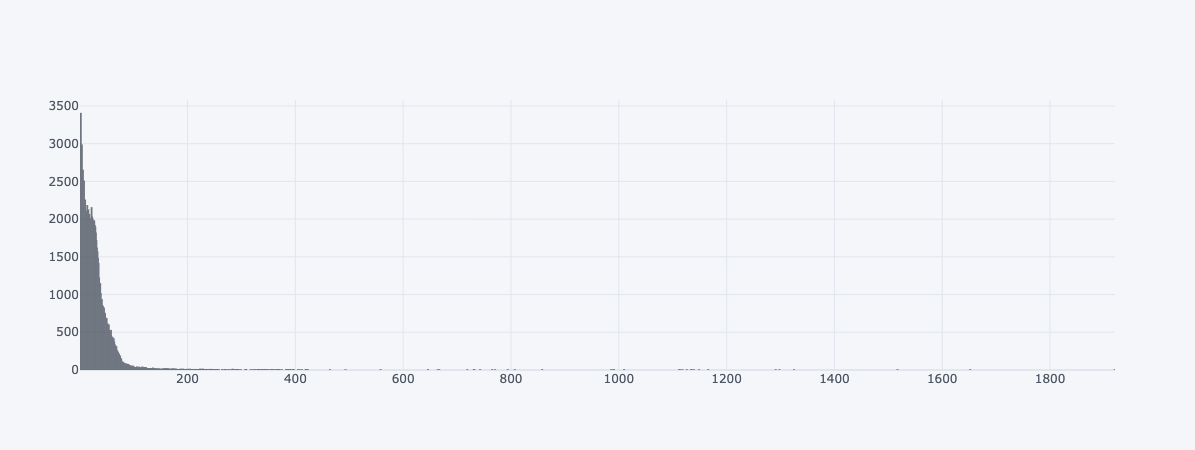

In [28]:
equal_distrib.iplot(kind='histogram')

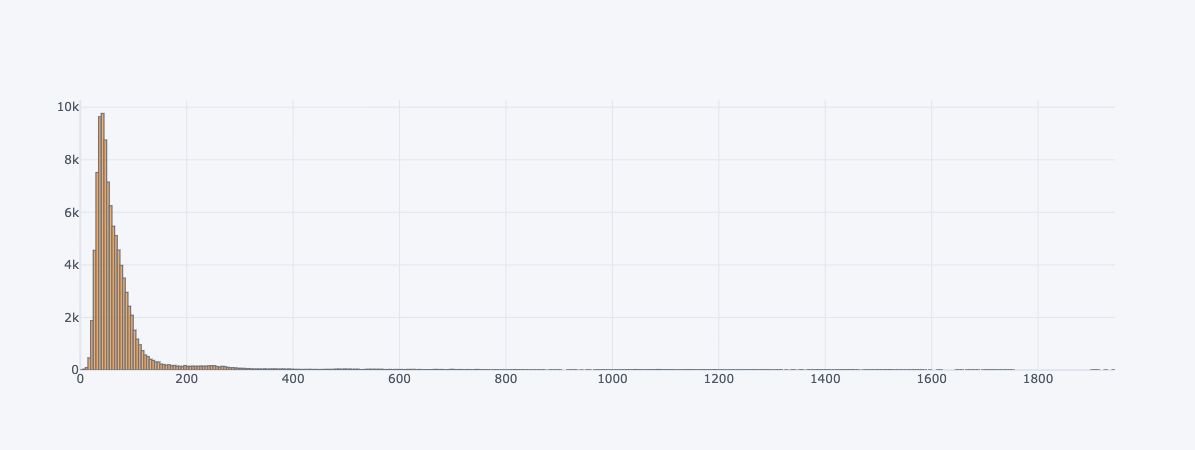

In [29]:
unequal_distrib.iplot(kind='histogram')

In [35]:
equal_distrib.median()

equal_distrib    22.0
dtype: float64

In [34]:
unequal_distrib.median()

unequal_distrib    55.0
dtype: float64

In [42]:
from scipy.stats import kruskal,mannwhitneyu, kstest, ks_2samp

print(kruskal(equal_distrib.equal_distrib.values, unequal_distrib.unequal_distrib.values))
print(mannwhitneyu(equal_distrib.equal_distrib.values, unequal_distrib.unequal_distrib.values))
print(ks_2samp(equal_distrib.equal_distrib.values, unequal_distrib.unequal_distrib.values))


KruskalResult(statistic=78981.84520463194, pvalue=0.0)
MannwhitneyuResult(statistic=1371604749.0, pvalue=0.0)
Ks_2sampResult(statistic=0.5839675835167033, pvalue=0.0)


In [48]:

print(kruskal(list(range(10)), list(range(10))))

KruskalResult(statistic=0.0, pvalue=1.0)
